**RUNNING LOCALLY, NOT ON GREENPLANET**

In [46]:
import numpy
import xarray
import cartopy
import cmocean

import matplotlib.pyplot as mp
import matplotlib.colors

open param data

In [114]:
file_root = '/Users/baird/Dropbox/_run_info_CESM/cesm2_runs/example_cesm2_outfiles/clm_surfdata/'
file_name = 'clm5_params.c171117.nc'

params_ds = xarray.open_dataset(file_root+file_name)

In [126]:
pftname = params_ds['pftname'].values
pftname = [i.decode('utf-8') for i in pftname]

print {{pftname}}

open surfdata

In [2]:
file_root = '/Users/baird/Dropbox/_run_info_CESM/cesm2_runs/example_cesm2_outfiles/clm_surfdata/'
file_name = 'surfdata_0.9x1.25_78pfts_CMIP6_simyr2000_c170824.nc'

surfdata_ds = xarray.open_dataset(file_root+file_name)

In [5]:
pct_crop = surfdata_ds['PCT_CROP'].values
pct_cft = surfdata_ds['PCT_CFT'].values
pct_natveg = surfdata_ds['PCT_NATVEG'].values

In [49]:
landfrac = surfdata_ds['LANDFRAC_PFT'].values

In [32]:
lat = surfdata_ds['LATIXY'].values[:,0]
lon = surfdata_ds['LONGXY'].values[0,:]

In [33]:
lon_pcolormesh = numpy.zeros(lon.size+2)
lon_pcolormesh[1:-1] = lon
lon_pcolormesh[0] = lon[0]-numpy.diff(lon)[0]
lon_pcolormesh[-1] = lon[-1]+numpy.diff(lon)[-1]

lon_pcolormesh_midpoints = lon_pcolormesh[:-1]+0.5*(numpy.diff(lon_pcolormesh))

lat_pcolormesh = numpy.zeros(lat.size+2)
lat_pcolormesh[1:-1] = lat
lat_pcolormesh[0] = lat[0]-numpy.diff(lat)[0]
lat_pcolormesh[-1] = lat[-1]+numpy.diff(lat)[-1]

lat_pcolormesh_midpoints = lat_pcolormesh[:-1]+0.5*(numpy.diff(lat_pcolormesh))

multiply together to get percent of GRID CELL of cft

In [59]:
pct_cropxcft = (numpy.expand_dims(pct_crop, axis=0)/100.)*(pct_cft/100.)*numpy.expand_dims(landfrac, axis=0)

In [105]:
pct_natvegxlandfrac = (pct_natveg/100.)*landfrac

In [76]:
oilpalm_idx = 39
oilpalm_irr_idx = 40
rice_idx = 47
winterwheat_irr_idx = 8

plot percent of grid cells with palm oil crop on them

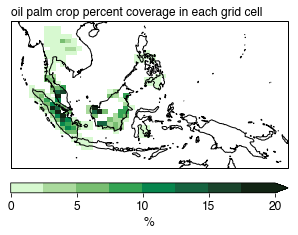

In [95]:
which_idx = oilpalm_idx
which_idx = oilpalm_irr_idx
#which_idx = rice_idx
#which_idx = winterwheat_irr_idx


lat_lo = -13
lat_hi = 22
lon_lo = 90
lon_hi = 156

fontsize=12
map_proj = cartopy.crs.PlateCarree()
data_proj = cartopy.crs.PlateCarree()
fig = mp.figure(figsize=(4.25,2.75))
ax = fig.add_subplot(111, projection=map_proj)

# ADD IRRIGATED AND RAINFED TOGETHER
field = pct_cropxcft[oilpalm_idx-1,:,:]+pct_cropxcft[oilpalm_irr_idx-1,:,:]
#field = pct_cropxcft[which_idx-1,:,:]
field[field==0] = numpy.nan

cmap = cmocean.cm.algae
levels = numpy.arange(0,20.1,2.5)
norm = matplotlib.colors.BoundaryNorm(levels, cmap.N)
contour_plot = ax.pcolormesh(lon_pcolormesh_midpoints,lat_pcolormesh_midpoints,\
                             field*100.,\
                             cmap=cmap,\
                             norm=norm,\
                             #cmocean.cm.turbid,\
                             vmin=0, vmax=20, transform=data_proj)
ax.coastlines(resolution='50m')
ax.set_extent([lon_lo,lon_hi,lat_lo,lat_hi], crs=map_proj)

fig.tight_layout()

axpos = ax.get_position()
cbar_ax = fig.add_axes([axpos.x0,axpos.y0-0.05,axpos.width,0.05])
cbar = mp.colorbar(contour_plot, cax=cbar_ax, orientation='horizontal', extend='max')
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('%',fontsize=fontsize)
cbar.set_ticks([0,5,10,15,20])

ax.text(s='oil palm crop percent coverage in each grid cell', \
        x=0, y=1.02, ha='left', va='bottom',\
        fontsize=fontsize, transform=ax.transAxes)

fig.savefig('oil_palm_coverage_from_surfdata.png', bbox_inches='tight', transparent=True, dpi=600)

plot percent of natural vegetation still left

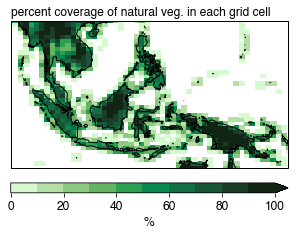

In [113]:
#which_idx = oilpalm_idx
#which_idx = oilpalm_irr_idx
#which_idx = rice_idx
#which_idx = winterwheat_irr_idx


lat_lo = -13
lat_hi = 22
lon_lo = 90
lon_hi = 156

fontsize=12
map_proj = cartopy.crs.PlateCarree()
data_proj = cartopy.crs.PlateCarree()
fig = mp.figure(figsize=(4.25,2.75))
ax = fig.add_subplot(111, projection=map_proj)

# ADD IRRIGATED AND RAINFED TOGETHER
field = pct_natvegxlandfrac
field[field==0] = numpy.nan

cmap = cmocean.cm.algae
levels = numpy.arange(0,100.1,10)
norm = matplotlib.colors.BoundaryNorm(levels, cmap.N)
contour_plot = ax.pcolormesh(lon_pcolormesh_midpoints,lat_pcolormesh_midpoints,\
                             field*100.,\
                             cmap=cmap,\
                             norm=norm,\
                             #cmocean.cm.turbid,\
                             vmin=levels.min(), vmax=levels.max(), transform=data_proj)
ax.coastlines(resolution='50m')
ax.set_extent([lon_lo,lon_hi,lat_lo,lat_hi], crs=map_proj)

fig.tight_layout()

axpos = ax.get_position()
cbar_ax = fig.add_axes([axpos.x0,axpos.y0-0.05,axpos.width,0.05])
cbar = mp.colorbar(contour_plot, cax=cbar_ax, orientation='horizontal', extend='max')
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('%',fontsize=fontsize)
#cbar.set_ticks([0,5,10,15,20])

ax.text(s='percent coverage of natural veg. in each grid cell', \
        x=0, y=1.02, ha='left', va='bottom',\
        fontsize=fontsize, transform=ax.transAxes)

fig.savefig('pct_natveg_from_surfdata.png', bbox_inches='tight', transparent=True, dpi=600)

global map

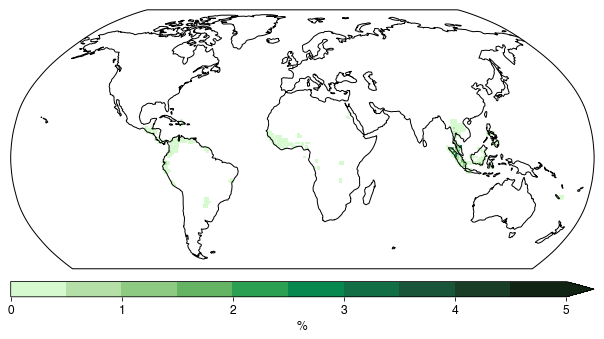

In [112]:
#which_idx = oilpalm_idx
#which_idx = oilpalm_irr_idxwhich_idx = rice_idx
#which_idx = winterwheat_irr_idx

lat_lo = -13
lat_hi = 22
lon_lo = 90
lon_hi = 156

fontsize=12
map_proj = cartopy.crs.Robinson(central_longitude=5)
data_proj = cartopy.crs.PlateCarree()
fig = mp.figure(figsize=(8.5,4.25))
ax = fig.add_subplot(111, projection=map_proj)

field = pct_cropxcft[which_idx-1,:,:]
field[field==0] = numpy.nan

cmap = cmocean.cm.algae
levels = numpy.arange(0,5.1,0.5)
norm = matplotlib.colors.BoundaryNorm(levels, cmap.N)
contour_plot = ax.pcolormesh(lon_pcolormesh_midpoints,lat_pcolormesh_midpoints,\
                             field*100.,\
                             cmap=cmap,\
                             norm=norm,\
                             #cmocean.cm.turbid,\
                             vmin=0, vmax=20, transform=data_proj)
ax.coastlines(resolution='110m')
x0,x1,y0,y1 = ax.get_extent()
ax.set_extent([x0,x1,y0*.75,y1], crs=map_proj)
#ax.outline_patch.set_visible(False)

fig.tight_layout()

axpos = ax.get_position()
cbar_ax = fig.add_axes([axpos.x0,axpos.y0-0.05,axpos.width,0.05])
cbar = mp.colorbar(contour_plot, cax=cbar_ax, orientation='horizontal', extend='max')
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('%',fontsize=fontsize)